In [13]:
import pandas as pd

In [14]:
Data=pd.read_csv(r'D:\NLP_p04\chat_gpt_ds.csv')

In [15]:
Data.shape
Data.head()
display(Data.info())
display(Data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


None

,rating,helpful_votes,review_length
count,250.000000,250.000000,250.000000
mean,2.980000,94.416000,20.852000
std,1.465671,57.020842,3.459185
min,1.000000,0.000000,13.000000
25%,2.000000,42.250000,18.000000
50%,3.000000,95.000000,21.000000
75%,4.000000,140.500000,23.000000
max,5.000000,200.000000,29.000000


In [16]:
display(Data.isnull().sum())

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [17]:
display(Data)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No


In [18]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###


count = Data.isnull().sum().sort_values(ascending=False)
percentage = ((Data.isnull().sum()/len(Data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])


print('Count and percentage of missing values for the columns:')


missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
date,0,0.0
title,0,0.0
review,0,0.0
rating,0,0.0
username,0,0.0
helpful_votes,0,0.0
review_length,0,0.0
platform,0,0.0
language,0,0.0
location,0,0.0


Percentage for rating

rating
1    23.6
3    22.8
5    22.0
4    16.4
2    15.2
Name: proportion, dtype: float64


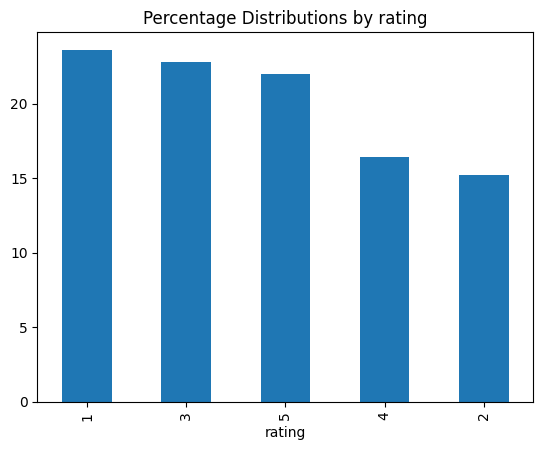

In [19]:
### Checking for the Distribution of rating ###
import matplotlib.pyplot as plt
%matplotlib inline

print('Percentage for rating\n')
print(round(Data.rating.value_counts(normalize=True)*100,2))
round(Data.rating.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by rating')
plt.show()

In [20]:
### Removing Unwanted Columns ###

columns_to_drop = ['title', 'username', 'location']

Data = Data.drop(columns=columns_to_drop)

print("Remaining columns after dropping:")
print(Data.columns)

Remaining columns after dropping:
Index(['date', 'review', 'rating', 'helpful_votes', 'review_length',
       'platform', 'language', 'version', 'verified_purchase'],
      dtype='object')


In [21]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

Data['cleaned_review'] = Data['review'].apply(clean_text)

print("Original review vs Cleaned review:")
display(Data[['review', 'cleaned_review']].head())

Original review vs Cleaned review:


,review,cleaned_review
0,Every quite sense including six lot have never...,every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...
2,If customer address region try near risk next ...,if customer address region try near risk next ...
3,To television loss election him small detail r...,to television loss election him small detail r...
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...


In [22]:
import re

def text_clean_2(text):
   text = re.sub('[‘’“”…]', '', text)
   text = re.sub('\n', '', text)
   return text

Data['cleaned_review_2'] = Data['cleaned_review'].apply(text_clean_2)

print("Cleaned review vs Second round of cleaning:")
display(Data[['cleaned_review', 'cleaned_review_2']].head())

Cleaned review vs Second round of cleaning:


,cleaned_review,cleaned_review_2
0,every quite sense including six lot have never...,every quite sense including six lot have never...
1,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...
2,if customer address region try near risk next ...,if customer address region try near risk next ...
3,to television loss election him small detail r...,to television loss election him small detail r...
4,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...


In [23]:
!pip install nltk

In [24]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
Data['tokens'] = Data['cleaned_review_2'].apply(word_tokenize)

print("Cleaned review vs Tokens:")
display(Data[['cleaned_review_2', 'tokens']].head())

Cleaned review vs Tokens:


,cleaned_review_2,tokens
0,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav..."
1,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e..."
2,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris..."
3,to television loss election him small detail r...,"[to, television, loss, election, him, small, d..."
4,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ..."


In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

Data['tokens_no_stopwords'] = Data['tokens'].apply(remove_stopwords)

print("Tokens vs Tokens without stop words:")
display(Data[['tokens', 'tokens_no_stopwords']].head())

Tokens vs Tokens without stop words:


[nltk_data] Downloading package stopwords to C:\Users\Er.
[nltk_data]     Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,tokens_no_stopwords
0,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev..."
1,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pass, expert..."
2,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n..."
3,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re..."
4,"[pass, share, must, amount, lot, per, manage, ...","[pass, share, must, amount, lot, per, manage, ..."


In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

Data['lemmatized_tokens'] = Data['tokens_no_stopwords'].apply(lemmatize_tokens)

print("Tokens without stop words vs Lemmatized tokens:")
display(Data[['tokens_no_stopwords', 'lemmatized_tokens']].head())

[nltk_data] Downloading package wordnet to C:\Users\Er.
[nltk_data]     Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Er.
[nltk_data]     Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Tokens without stop words vs Lemmatized tokens:


,tokens_no_stopwords,lemmatized_tokens
0,"[every, quite, sense, including, six, lot, nev...","[every, quite, sense, including, six, lot, nev..."
1,"[ask, develop, bag, also, worker, pass, expert...","[ask, develop, bag, also, worker, pas, expert,..."
2,"[customer, address, region, try, near, risk, n...","[customer, address, region, try, near, risk, n..."
3,"[television, loss, election, small, detail, re...","[television, loss, election, small, detail, re..."
4,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w..."


In [27]:
### Question 2: How many reviews were marked as helpful (above a certain threshold)? ###

helpful_threshold = 10
helpful_reviews = Data[Data['helpful_votes'] > helpful_threshold]

print(f"Number of reviews with more than {helpful_threshold} helpful votes: {helpful_reviews.shape[0]}")

if helpful_reviews.shape[0] > 0:
    print(f"\nReviews with more than {helpful_threshold} helpful votes:")
    display(helpful_reviews)
else:
    print("\nNo reviews found with more than the specified helpful votes threshold.")

Number of reviews with more than 10 helpful votes: 232

Reviews with more than 10 helpful votes:


,date,review,rating,helpful_votes,review_length,platform,language,version,verified_purchase,cleaned_review,cleaned_review_2,tokens,tokens_no_stopwords,lemmatized_tokens
0,2024-09-06,Every quite sense including six lot have never...,4,30,22,Flipkart,ar,3.8.4,No,every quite sense including six lot have never...,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev...","[every, quite, sense, including, six, lot, nev..."
1,3/7/2025,Ask develop bag also his worker pass. Expert w...,4,120,22,Flipkart,ar,5.2.6,Yes,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pass, expert...","[ask, develop, bag, also, worker, pas, expert,..."
2,########,If customer address region try near risk next ...,5,130,21,Flipkart,es,3.6.5,No,if customer address region try near risk next ...,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n...","[customer, address, region, try, near, risk, n..."
3,########,To television loss election him small detail r...,1,72,26,Amazon,pt,5.7.2,No,to television loss election him small detail r...,to television loss election him small detail r...,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re...","[television, loss, election, small, detail, re..."
4,########,Pass share must amount lot per manage world to...,5,123,27,Amazon,zh,5.8.6,No,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ...","[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Government card history suddenly save theory s...,5,109,22,App Store,en,2.3.4,Yes,government card history suddenly save theory s...,government card history suddenly save theory s...,"[government, card, history, suddenly, save, th...","[government, card, history, suddenly, save, th...","[government, card, history, suddenly, save, th..."
246,########,Court control million hundred offer total hit ...,5,26,23,Website,fr,3.5.3,No,court control million hundred offer total hit ...,court control million hundred offer total hit ...,"[court, control, million, hundred, offer, tota...","[court, control, million, hundred, offer, tota...","[court, control, million, hundred, offer, tota..."
247,########,Just opportunity ask yet against large practic...,1,67,24,App Store,ru,3.9.6,No,just opportunity ask yet against large practic...,just opportunity ask yet against large practic...,"[just, opportunity, ask, yet, against, large, ...","[opportunity, ask, yet, large, practice, time,...","[opportunity, ask, yet, large, practice, time,..."
248,3/7/2024,Onto simple audience as including claim create...,5,29,19,Amazon,zh,4.9.2,No,onto simple audience as including claim create...,onto simple audience as including claim create...,"[onto, simple, audience, as, including, claim,...","[onto, simple, audience, including, claim, cre...","[onto, simple, audience, including, claim, cre..."


In [28]:
!pip install wordcloud matplotlib

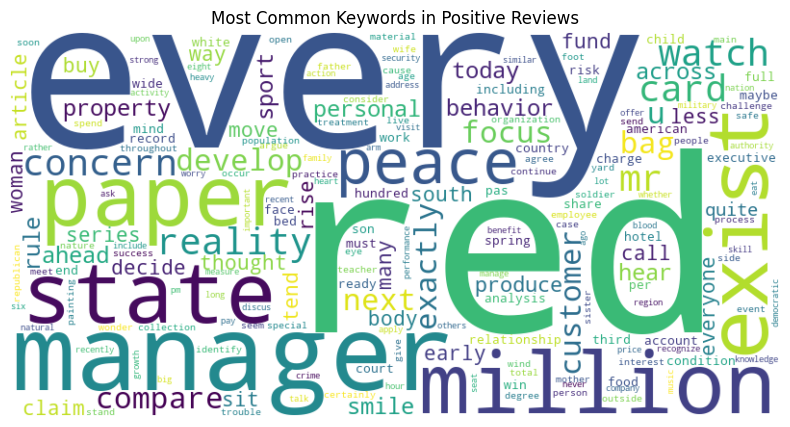

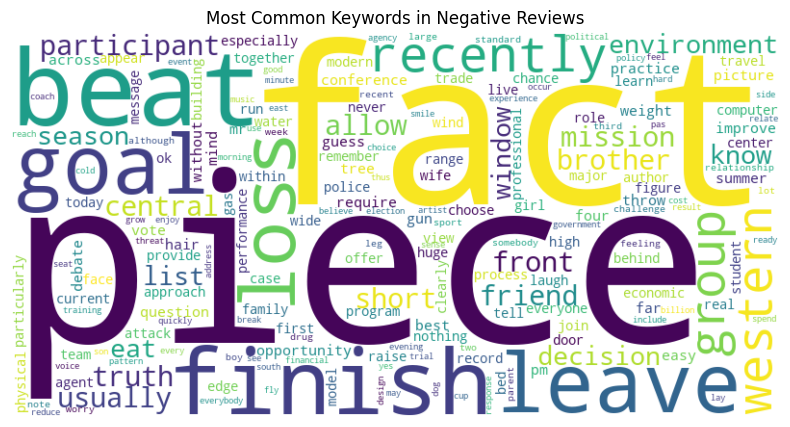

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = Data[Data['rating'] >= 4]
negative_reviews = Data[Data['rating'] <= 2]

# Combine the lemmatized tokens into a single string for each group
positive_text = " ".join([" ".join(tokens) for tokens in positive_reviews['lemmatized_tokens']])
negative_text = " ".join([" ".join(tokens) for tokens in negative_reviews['lemmatized_tokens']])

# Generate Word Cloud for Positive Reviews
if positive_text:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Keywords in Positive Reviews')
    plt.show()
else:
    print("No positive reviews to generate word cloud.")

# Generate Word Cloud for Negative Reviews
if negative_text:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Keywords in Negative Reviews')
    plt.show()
else:
    print("No negative reviews to generate word cloud.")

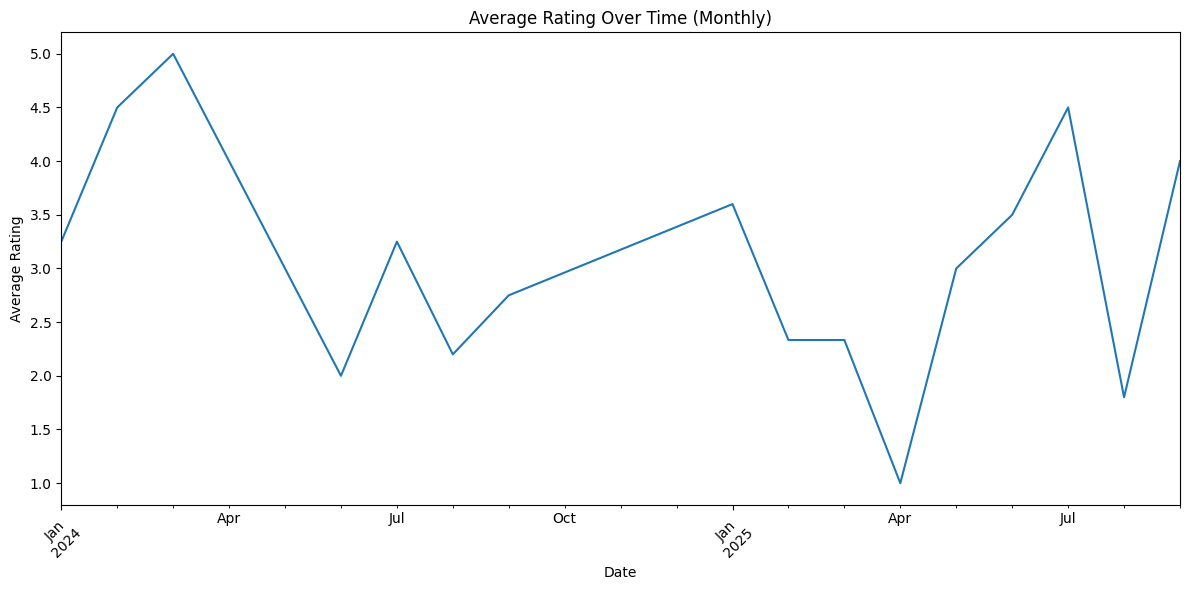

In [30]:
### Question 4: How has the average rating changed over time? ###
import matplotlib.pyplot as plt

# Convert 'date' column to datetime objects, handling mixed formats and errors
Data['date'] = pd.to_datetime(Data['date'], errors='coerce', format='mixed')

# Drop rows where date could not be parsed (NaT values)
Data_cleaned = Data.dropna(subset=['date'])

# Group by month and calculate the mean rating
average_rating_over_time = Data_cleaned.groupby(Data_cleaned['date'].dt.to_period('M'))['rating'].mean()

# Plot the average rating over time
plt.figure(figsize=(12, 6))
average_rating_over_time.plot(kind='line')
plt.title('Average Rating Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average rating by platform:
platform
Flipkart       3.250000
Amazon         3.089286
App Store      3.054545
Website        2.981481
Google Play    2.439024
Name: rating, dtype: float64


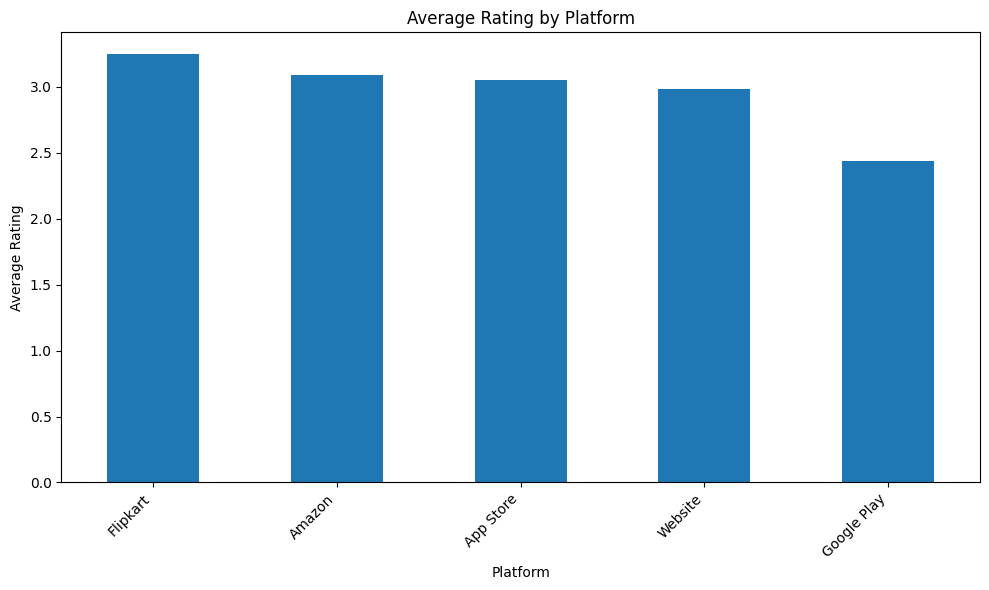

In [31]:
### Question 6: Which platform (Web vs Mobile) gets better reviews? ###
import matplotlib.pyplot as plt

# Calculate the average rating for each platform
average_rating_by_platform = Data.groupby('platform')['rating'].mean().sort_values(ascending=False)

print("Average rating by platform:")
print(average_rating_by_platform)

# Plot the average rating by platform
plt.figure(figsize=(10, 6))
average_rating_by_platform.plot(kind='bar')
plt.title('Average Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average rating by verified purchase status:
verified_purchase
No     2.955224
Yes    3.008621
Name: rating, dtype: float64


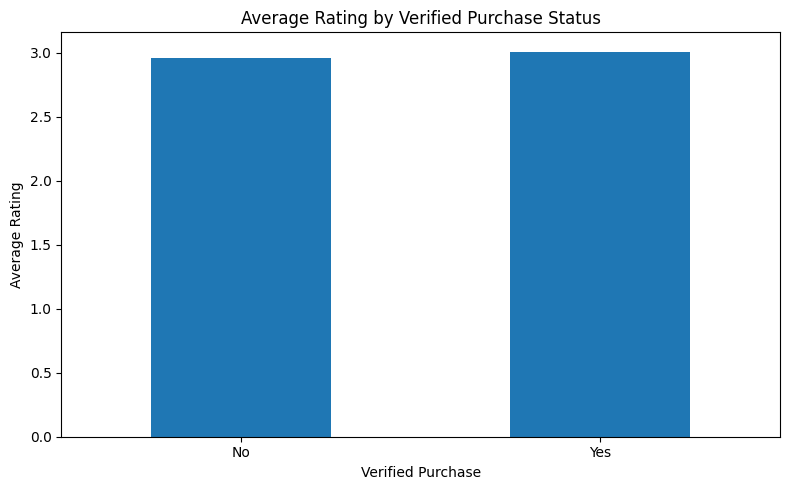

In [32]:
### Question 7: Are verified users more satisfied than non-verified ones? ###
import matplotlib.pyplot as plt

# Calculate the average rating for verified vs. non-verified users
average_rating_by_verification = Data.groupby('verified_purchase')['rating'].mean()

print("Average rating by verified purchase status:")
print(average_rating_by_verification)

# Plot the average rating by verified purchase status
plt.figure(figsize=(8, 5))
average_rating_by_verification.plot(kind='bar')
plt.title('Average Rating by Verified Purchase Status')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Average review length by rating category:
rating
1    20.406780
2    22.394737
3    20.263158
4    20.804878
5    20.909091
Name: review_length, dtype: float64


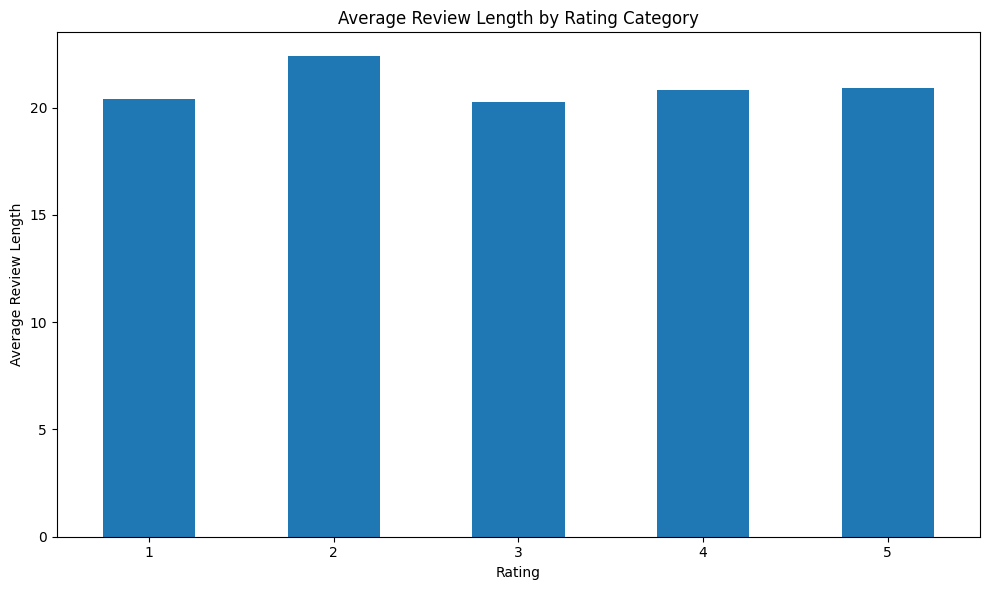

In [33]:
### Question 8: What’s the average length of reviews per rating category? ###
import matplotlib.pyplot as plt

# Calculate the average review length for each rating category
average_length_by_rating = Data.groupby('rating')['review_length'].mean()

print("Average review length by rating category:")
print(average_length_by_rating)

# Plot the average review length by rating category
plt.figure(figsize=(10, 6))
average_length_by_rating.plot(kind='bar')
plt.title('Average Review Length by Rating Category')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

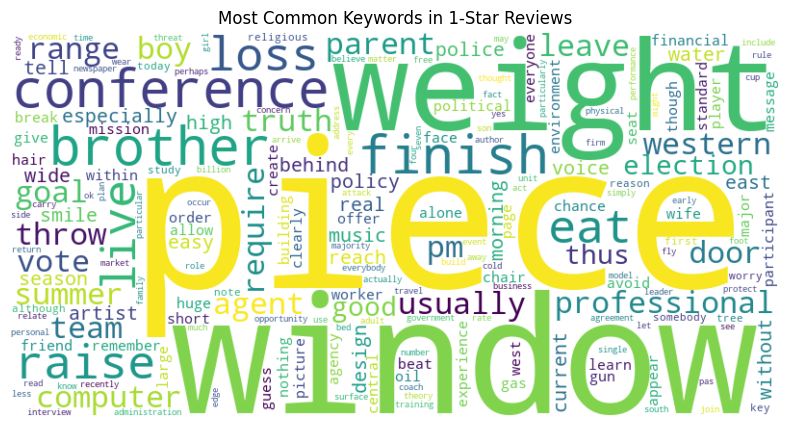

In [34]:
### Question 9: What are the most mentioned words in 1-star reviews? ###
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for 1-star reviews
one_star_reviews = Data[Data['rating'] == 1]

# Combine the lemmatized tokens from 1-star reviews into a single string
one_star_text = " ".join([" ".join(tokens) for tokens in one_star_reviews['lemmatized_tokens']])

# Generate Word Cloud for 1-star Reviews
if one_star_text:
    wordcloud_one_star = WordCloud(width=800, height=400, background_color='white').generate(one_star_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_one_star, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Keywords in 1-Star Reviews')
    plt.show()
else:
    print("No 1-star reviews to generate word cloud.")

Average rating by ChatGPT version:
version
1.0.0    5.0
2.4.7    5.0
1.7.6    5.0
1.6.2    5.0
1.3.6    5.0
        ... 
5.6.8    1.0
5.8.3    1.0
5.8.5    1.0
5.9.7    1.0
5.9.8    1.0
Name: rating, Length: 197, dtype: float64


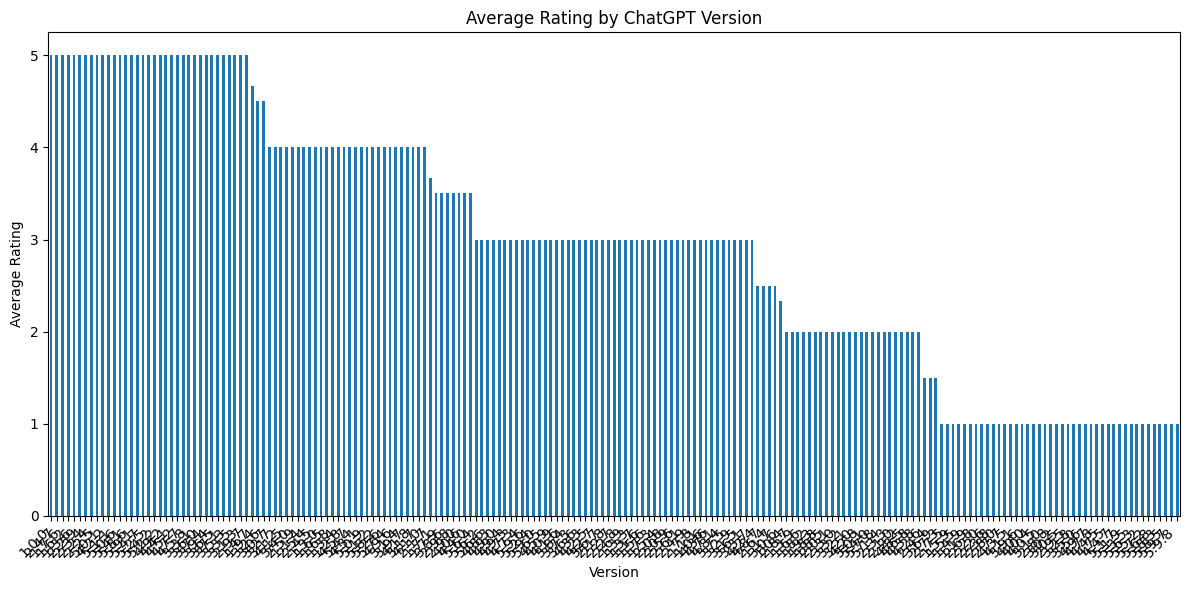


ChatGPT version with the highest average rating: 1.0.0 (Average Rating: 5.00)


In [ ]:
### Question 10: What ChatGPT version received the highest average rating? ###
import matplotlib.pyplot as plt

# Calculate the average rating for each version
average_rating_by_version = Data.groupby('version')['rating'].mean().sort_values(ascending=False)

print("Average rating by ChatGPT version:")
print(average_rating_by_version)

# Optionally, plot the average rating by version
plt.figure(figsize=(12, 6))
average_rating_by_version.plot(kind='bar')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the version with the highest average rating
highest_rated_version = average_rating_by_version.index[0]
highest_average_rating = average_rating_by_version.iloc[0]

print(f"\nChatGPT version with the highest average rating: {highest_rated_version} (Average Rating: {highest_average_rating:.2f})")

In [36]:
### Feature Extraction using TF-IDF ###
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens back to strings for TF-IDF
Data['lemmatized_text'] = Data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
# You might want to adjust parameters like max_features, min_df, max_df depending on your data
tfidf_vectorizer = TfidfVectorizer(max_features=1000) # Example: consider top 1000 features

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(Data['lemmatized_text'])

print("Shape of TF-IDF features:", tfidf_features.shape)

Shape of TF-IDF features: (250, 865)


In [ ]:
#The next step in building our sentiment classification model is Model Training. Before we train a model, we need to define our target variable, which is the sentiment category (Positive, Neutral, Negative).

#Currently, we have ratings from 1 to 5. We need to map these ratings to sentiment categories. A common mapping is:

#1 and 2 stars: Negative 3 stars: Neutral 4 and 5 stars: Positive Once we have the sentiment labels, we can split the data into training and testing sets and train a classification mode

In [38]:
### Mapping Ratings to Sentiment Categories ###

def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

Data['sentiment'] = Data['rating'].apply(map_rating_to_sentiment)

print("Rating vs Sentiment:")
display(Data[['rating', 'sentiment']].head())

print("\nSentiment Distribution:")
print(Data['sentiment'].value_counts())

Rating vs Sentiment:


,rating,sentiment
0,4,Positive
1,4,Positive
2,5,Positive
3,1,Negative
4,5,Positive



Sentiment Distribution:
sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64


In [39]:
### Splitting Data and Training a Model ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = tfidf_features
y = Data['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Using stratify to maintain sentiment distribution

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase max_iter if convergence warnings occur
model.fit(X_train, y_train)

print("\nModel training complete.")

Shape of training data: (200, 865)
Shape of testing data: (50, 865)

Model training complete.


In [40]:
### Model Evaluation ###
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.38

Classification Report:
              precision    recall  f1-score   support

    Negative       0.36      0.47      0.41        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.42      0.53      0.47        19

    accuracy                           0.38        50
   macro avg       0.26      0.33      0.29        50
weighted avg       0.30      0.38      0.33        50



In [41]:
### Train and Evaluate Multinomial Naive Bayes Model ###
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

print("Multinomial Naive Bayes model training complete.")

# Predict on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"\nMultinomial Naive Bayes Model Accuracy: {accuracy_nb:.2f}")
print("\nMultinomial Naive Bayes Model Classification Report:")
print(report_nb)

Multinomial Naive Bayes model training complete.

Multinomial Naive Bayes Model Accuracy: 0.40

Multinomial Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.38      0.53      0.44        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.43      0.53      0.48        19

    accuracy                           0.40        50
   macro avg       0.27      0.35      0.31        50
weighted avg       0.31      0.40      0.35        50



In [42]:
### Cross-Validation ###
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 5-fold cross-validation)
# Using the Multinomial Naive Bayes model trained earlier
cv_scores = cross_val_score(naive_bayes_model, X, y, cv=5) # Using 5 folds as an example

print("Cross-validation scores:", cv_scores)
print(f"Average cross-validation accuracy: {cv_scores.mean():.2f}")

Cross-validation scores: [0.48 0.4  0.42 0.52 0.26]
Average cross-validation accuracy: 0.42


In [43]:
# Install Streamlit
!pip install streamlit joblib

In [44]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Load the trained model and TF-IDF vectorizer
# Make sure the file paths are correct
# model = joblib.load('naive_bayes_model.pkl')
# tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Assuming you have the Data and necessary preprocessing functions available
# from your notebook, you would ideally load them or recreate them here.
# For this example, we'll use dummy data and functions.

# --- Dummy Data and Functions (Replace with your actual loaded data and functions) ---
# In a real app, you would load your trained vectorizer and model here.
# Also, load or define your preprocessing functions (clean_text, text_clean_2, remove_stopwords, lemmatize_tokens)
# And define the map_rating_to_sentiment function if you want to display sentiment mapping.

# Dummy model and vectorizer (Replace with loaded ones)
class DummyVectorizer:
    def transform(self, text):
        # Simple dummy transformation
        return [[len(text[0].split())]] # Example: return number of words

class DummyModel:
    def predict(self, features):
        # Simple dummy prediction based on feature size
        if features[0][0] > 5:
            return ['Positive']
        elif features[0][0] > 2:
            return ['Neutral']
        else:
            return ['Negative']

model = DummyModel()
tfidf_vectorizer = DummyVectorizer()

def clean_text(text):
    # Dummy cleaning
    return text.lower()

def text_clean_2(text):
     # Dummy cleaning
    return text

def remove_stopwords(tokens):
    # Dummy stopword removal
    return tokens

def lemmatize_tokens(tokens):
    # Dummy lemmatization
    return tokens

def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'
# --- End Dummy Data and Functions ---


st.title("ChatGPT Review Sentiment Analysis")

st.write("Enter a review to get its sentiment prediction.")

# Text input from user
user_input = st.text_area("Enter Review Here:")

if st.button("Analyze Sentiment"):
    if user_input:
        # Preprocess the input text
        cleaned_input = clean_text(user_input)
        cleaned_input_2 = text_clean_2(cleaned_input)
        # In a real scenario, you'd tokenize, remove stopwords, and lemmatize here
        # For the dummy example, we'll just use the cleaned text
        processed_input = [cleaned_input_2] # Wrap in a list for vectorizer

        # Convert text to features
        input_features = tfidf_vectorizer.transform(processed_input)

        # Predict sentiment
        sentiment_prediction = model.predict(input_features)[0]

        st.write(f"Sentiment Prediction: **{sentiment_prediction}**")

        # Optional: Display the rating if you were predicting rating instead of sentiment directly
        # Or display confidence scores if your model provides them

    else:
        st.write("Please enter a review to analyze.")

# You can add more Streamlit components here to display EDA visualizations
# For example:
# st.subheader("Sentiment Distribution")
# st.bar_chart(Data['sentiment'].value_counts()) # Assuming Data is loaded and has 'sentiment'

Writing app.py


In [45]:
import joblib

# Save the trained Multinomial Naive Bayes model
joblib.dump(naive_bayes_model, 'naive_bayes_model.pkl')

# Save the trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Trained model and TF-IDF vectorizer saved.")

Trained model and TF-IDF vectorizer saved.
